#**Label-free prediction - fnet**
---

<font size = 4> 
Label-free prediction (fnet) is a neural network developped to infer the distribution of specific cellular structures from label-free images such as brightfield or EM images. It was first published in 2018 by [Ounkomol *et al.* in Nature Methods](https://www.nature.com/articles/s41592-018-0111-2). The network uses a common U-Net architecture and is trained using paired imaging volumes from the same field of view, imaged in a label-free (e.g. brightfield) and labelled condition (e.g. fluorescence images of a specific label of interest). When trained, this allows the user to identify certain structures from brightfield images alone. The performance of fnet may depend significantly on the structure at hand.

---
<font size = 4> *Disclaimer*:

<font size = 4> This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4> This notebook is largely based on the paper: 

**Label-free prediction of three-dimensional fluorescence images from transmitted light microscopy** by Ounkomol *et al.* in Nature Methods, 2018 (https://www.nature.com/articles/s41592-018-0111-2)

<font size = 4> And source code found in: https://github.com/AllenCellModeling/pytorch_fnet

<font size = 4> **Please also cite this original paper when using or developing this notebook.** 


# **How to use this notebook?**
---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

#**0. Before getting started**
---
<font size = 4>**Data Format**

<font size = 4> **The data used to train fnet (2D) must be 2D images in .tiff (.tif) file format and contain the signal (e.g. bright-field image) and the target channel (e.g. fluorescence) for each field of view**. To use this notebook on user data, upload the data in the following format to your google drive. To ensure corresponding images are used during training give corresponding signal and target images the same name.

<font size = 4>Information on how to generate a training dataset is available in our Wiki page: https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki

<font size = 4> **Note: Your *dataset_folder* should not have spaces or brackets in its name as this is not recognized by the fnet code and will throw an error** 


*   Experiment A
    - **Training dataset**
      - bright-field images
        - img_1.tif, img_2.tif, ...
      - fluorescence images
        - img_1.tif, img_2.tif, ...
    - **Quality control dataset**
     - bright-field images
        - img_1.tif, img_2.tif
      - fluorescence images
        - img_1.tif, img_2.tif
    - **Data to be predicted**
    - **Results**

<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.

---


#**1. Install fnet and dependencies**
---
<font size = 4>Running fnet requires the fnet folder to be downloaded into the session's Files. As fnet needs several packages to be installed, this step may take a few minutes.

<font size = 4>You can ignore **the error warnings** as they refer to packages not required for this notebook.

<font size = 4>**Note: It is not necessary to keep the pytorch_fnet folder after you are finished using the notebook, so it can be deleted afterwards by playing the last cell (bottom).**

## **1.1. Install key dependencies**
---

In [1]:
#@markdown ##Install fnet and dependencies
!pip install fpdf
!pip install -U scipy==1.2.0
!pip install tifffile==2019.7.26
!pip install matplotlib==2.2.3
!pip uninstall -y -q tensorflow
!pip install -q tensorflow-probability==0.8
!pip install -q kapre==0.1.7
!pip install -q tensorflow==2.8

#Force session restart
exit(0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40725 sha256=8613e7cc6625aa13bdbb69ed75d67421c2c03666ea02d0674222c5c7ace6bf12
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built fpdf
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 26.6 MB 75.1 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.2.0 which is incompatible.
jaxlib 0.3.14+cuda11.cudnn805 requires scipy>=1.

     |████████████████████████████████| 2.5 MB 5.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 1.1.1 which is incompatible.
     |████████████████████████████████| 511.7 MB 6.0 kB/s 
     |████████████████████████████████| 1.6 MB 48.3 MB/s 
     |████████████████████████████████| 5.8 MB 41.5 MB/s 
     |████████████████████████████████| 438 kB 68.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.3.14+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.2.0 which is incompatible.
     |████████████████████████████████| 668.3 MB 17 kB/s 
     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 462 k

## **1.2. Restart your runtime**
---
<font size = 4>


**<font size = 4> Ignore the following message error message. Your Runtime has automatically restarted. This is normal.**

<img width="40%" alt ="" src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/session_crash.png"><figcaption>  </figcaption>

## **1.3. Load key dependencies**
---
<font size = 4> 

In [1]:
Notebook_version = '1.13.1'
Network = 'fnet (2D)'

from builtins import any as b_any

def get_requirements_path():
    # Store requirements file in 'contents' directory 
    current_dir = os.getcwd()
    dir_count = current_dir.count('/') - 1
    path = '../' * (dir_count) + 'requirements.txt'
    return path

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

def build_requirements_file(before, after):
    path = get_requirements_path()

    # Exporting requirements.txt for local run
    !pip freeze > $path

    # Get minimum requirements file
    df = pd.read_csv(path, delimiter = "\n")
    mod_list = [m.split('.')[0] for m in after if not m in before]
    req_list_temp = df.values.tolist()
    req_list = [x[0] for x in req_list_temp]

    # Replace with package name and handle cases where import name is different to module name
    mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
    mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list] 
    filtered_list = filter_files(req_list, mod_replace_list)

    file=open(path,'w')
    for item in filtered_list:
        file.writelines(item + '\n')

    file.close()

import sys
before = [str(m) for m in sys.modules]

# !pip install fpdf
# !pip install -U scipy==1.2.0
# !pip install tifffile==2019.7.26
# !pip install matplotlib==2.2.3
#@markdown ##Load key dependencies
import os
import csv
import shutil
import random
from tempfile import mkstemp
from shutil import move, copymode
from os import fdopen, remove
import numpy as np
import shutil
from tempfile import mkstemp
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage import img_as_float32
from distutils.dir_util import copy_tree
from datetime import datetime
from astropy.visualization import simple_norm
import time
from fpdf import FPDF, HTMLMixin
from pip._internal.operations.freeze import freeze
import subprocess
from ipywidgets import interact
import ipywidgets as widgets

#clone fnet from github to colab
!git clone -b release_1 --single-branch https://github.com/AllenCellModeling/pytorch_fnet.git; cd pytorch_fnet; pip install .

from skimage import io
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib as mpl


def replace(file_path, pattern, subst):
  """Function replaces a pattern in a .py file with a new pattern."""
  
  """Parameters:
      -file_path (string): path to the file to be changed.
      -pattern (string): pattern to be replaced. Make sure this is as unique as possible.
      -subst (string): new pattern. """
  #Create temp file
  fh, abs_path = mkstemp()
  with fdopen(fh,'w') as new_file:
      with open(file_path) as old_file:
          for line in old_file:
              new_file.write(line.replace(pattern, subst))
  #Copy the file permissions from the old file to the new file
  copymode(file_path, abs_path)
  #Remove original file
  remove(file_path)
  #Move new file
  move(abs_path, file_path)

def add_insert(filepath,line_number,insertion,append):
  """Function which inserts the a line into a document."""
  
  """Parameters:
    -filepath (string): path to the file which needs to be edited.
    -line (integer): Where to insert the new line. In the file, this line is ideally an empty one.
    -insertion (string): The line to be inserted. If it already exists it will not be added again.
    -append (string): If anything additional needs to be appended to the line, use this. Otherwise, leave as "" """
  
  f = open(filepath, "r")
  contents = f.readlines()
  f.close()
  f = open(filepath, "r")
  if not insertion in f.read():
    contents.insert(line_number, insertion)
    if append != "":
      contents.append(append)
  f.close()
  f = open(filepath, "w")
  contents = "".join(contents)
  f.write(contents)
  f.close()


def convert_to_script_compatible_path(original_path):
  """Function which converts 'original_path' into a compatible format 'new_full_path' with the fnet .sh files """
  new_full_path = ""
  for s in original_path:
    if s=='/':
      new_full_path += '\/'
    else:
      new_full_path += s

  return new_full_path


def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """This function is adapted from Martin Weigert"""
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):#dtype=np.float32
    """This function is adapted from Martin Weigert"""
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x

def norm_minmse(gt, x, normalize_gt=True):
    """This function is adapted from Martin Weigert"""

    """
    normalizes and affinely scales an image pair such that the MSE is minimized  
     
    Parameters
    ----------
    gt: ndarray
        the ground truth image      
    x: ndarray
        the image that will be affinely scaled 
    normalize_gt: bool
        set to True of gt image should be normalized (default)
    Returns
    -------
    gt_scaled, x_scaled 
    """
    if normalize_gt:
        gt = normalize(gt, 0.1, 99.9, clip=False).astype(np.float32, copy = False)
    x = x.astype(np.float32, copy=False) - np.mean(x)
    #x = x - np.mean(x)
    gt = gt.astype(np.float32, copy=False) - np.mean(gt)
    #gt = gt - np.mean(gt)
    scale = np.cov(x.flatten(), gt.flatten())[0, 1] / np.var(x.flatten())
    return gt, scale * x

#Here we replace values in the old files
#Change maximum pixel number
replace("/content/pytorch_fnet/fnet/transforms.py",'n_max_pixels=9732096','n_max_pixels=20000000')
replace("/content/pytorch_fnet/predict.py",'6000000','20000000')

#Prevent resizing in the training and the prediction
replace("/content/pytorch_fnet/predict.py","0.37241","1.0")
replace("/content/pytorch_fnet/train_model.py","0.37241","1.0")

#Change the default dataset type in the training module to .tif
replace("/content/pytorch_fnet/train_model.py","'--class_dataset', default='CziDataset'","'--class_dataset', default='TiffDataset'")



#2D 

replace("/content/pytorch_fnet/train_model.py","default=[32, 64, 64]","default=[128, 128]")
replace("/content/pytorch_fnet/train_model.py","'--nn_module', default='fnet_nn_3d'","'--nn_module', default='fnet_nn_2d'")

replace("/content/pytorch_fnet/train_model.py",", default_resizer_str]","]")
#replace("/content/pytorch_fnet/predict.py",", default_resizer_str]","]")



print("-------------------")
print("Libraries installed")

# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'


# Check if this is the latest version of the notebook
All_notebook_versions = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_Notebook_versions.csv", dtype=str)
print('Notebook version: '+Notebook_version)
Latest_Notebook_version = All_notebook_versions[All_notebook_versions["Notebook"] == Network]['Version'].iloc[0]
print('Latest notebook version: '+Latest_Notebook_version)
if Notebook_version == Latest_Notebook_version:
  print("This notebook is up-to-date.")
else:
  print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")

def pdf_export(trained = False, augmentation = False, pretrained_model = False):
  class MyFPDF(FPDF, HTMLMixin):
      pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  Network = 'Label-free Prediction (fnet)'
  day = datetime.now()
  date_time = str(day)[0:10]

  Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+date_time
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 
    
  # add another cell 
  if trained:
    training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
    pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
  pdf.ln(1)

  Header_2 = 'Information for your materials and methods:'
  pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '
  #print(all_packages)

  #Main Packages
  main_packages = ''
  version_numbers = []
  for name in ['tensorflow','numpy','torch','scipy']:
    find_name=all_packages.find(name)
    main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
    #Version numbers only here:
    version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

  cuda_version = subprocess.run('nvcc --version',stdout=subprocess.PIPE, shell=True)
  cuda_version = cuda_version.stdout.decode('utf-8')
  cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
  gpu_name = subprocess.run('nvidia-smi',stdout=subprocess.PIPE, shell=True)
  gpu_name = gpu_name.stdout.decode('utf-8')
  gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]

  shape = io.imread(Training_source+'/'+os.listdir(Training_source)[1]).shape
  dataset_size = len(os.listdir(Training_source))

  text = 'The '+Network+' model was trained from scratch for '+str(steps)+' steps on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(32)+','+str(64)+','+str(64)+')) with a batch size of '+str(batch_size)+' and an MSE loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), torch (v '+version_numbers[2]+'), scipy (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  #text = 'The '+Network+' model ('+model_name+') was trained using '+str(dataset_size)+' paired images (image dimensions: '+str(shape)+') using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), torch (v '+version_numbers[2]+'), scipy (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The GPU used was a '+gpu_name+'.'

  #if Use_pretrained_model:
  #  text = 'The '+Network+' model ('+model_name+') was trained using '+str(dataset_size)+' paired images (image dimensions: '+str(shape)+') using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), pytorch (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The GPU used was a '+gpu_name+'. The model was trained from the pretrained model: '+pretrained_model_path+'.'

  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.multi_cell(190, 5, txt = text, align='L')
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(1)
  pdf.cell(28, 5, txt='Augmentation: ', ln=0)
  pdf.set_font('')
  if augmentation:
    aug_text = 'The dataset was augmented by'
    if Rotation:
      aug_text = aug_text+'\n- rotation'
    if Flip:
      aug_text = aug_text+'\n- flipping'
  else:
    aug_text = 'No augmentation was used for training.'
  pdf.multi_cell(190, 5, txt=aug_text, align='L')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  # if Use_Default_Advanced_Parameters:
  #   pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
  pdf.cell(200, 5, txt='The following parameters were used for training:')
  pdf.ln(1)
  html = """ 
  <table width=40% style="margin-left:0px;">
    <tr>
      <th width = 50% align="left">Parameter</th>
      <th width = 50% align="left">Value</th>
    </tr>
    <tr>
      <td width = 50%>percentage_validation</td>
      <td width = 50%>{0}</td>
    </tr>
    <tr>
      <td width = 50%>steps</td>
      <td width = 50%>{1}</td>
    </tr>
    <tr>
      <td width = 50%>batch_size</td>
      <td width = 50%>{2}</td>
  </table>
  """.format(percentage_validation,steps,batch_size)
  pdf.write_html(html)

  #pdf.multi_cell(190, 5, txt = text_2, align='L')
  pdf.set_font("Arial", size = 11, style='B')
  pdf.ln(1)
  pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(30, 5, txt= 'Training_source:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_source, align = 'L')
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(28, 5, txt= 'Training_target:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_target, align = 'L')
  #pdf.cell(190, 5, txt=aug_text, align='L', ln=1)
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(22, 5, txt= 'Model Path:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = model_path+'/'+model_name, align = 'L')
  pdf.ln(1)
  pdf.cell(60, 5, txt = 'Example Training pair (single slice)', ln=1)
  pdf.ln(1)
  exp_size = io.imread('/content/TrainingDataExample_Fnet.png').shape
  pdf.image('/content/TrainingDataExample_Fnet.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  ref_2 = '- Label-free prediction (fnet): Ounkomol, Chawin, et al. "Label-free prediction of three-dimensional fluorescence images from transmitted-light microscopy." Nature methods 15.11 (2018): 917-920.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  pdf.ln(3)
  reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  if trained:
    pdf.output(model_path+'/'+model_name+'/'+model_name+'_'+date_time+"_training_report.pdf")
  else:
    pdf.output('/content/'+model_name+'_'+date_time+"_training_report.pdf")
  


def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  Network = 'Label-free prediction (fnet)'
  #model_name = os.path.basename(QC_model_folder)
  day = datetime.now()
  date_time = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+QC_model_name+')\nDate: '+date_time
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Development of Training Losses', ln=1, align='L')
  if os.path.exists(full_QC_model_path+'/QualityControl/lossCurvePlots.png'):
    exp_size = io.imread(full_QC_model_path+'/QualityControl/lossCurvePlots.png').shape
    pdf.image(full_QC_model_path+'/QualityControl/lossCurvePlots.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  else:
    pdf.set_font('')
    pdf.set_font('Arial', size=10)
    # pdf.ln(3)
    pdf.multi_cell(190, 5, txt='If you would like to see the evolution of the loss function during training please play the first cell of the QC section in the notebook.')
  pdf.ln(3)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/QualityControl/QC_example_data.png').shape
  pdf.image(full_QC_model_path+'/QualityControl/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Quality Control Metrics', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)

  pdf.ln(1)
  html = """
  <body>
  <font size="10" face="Courier New" >
  <table width=97% style="margin-left:0px;">"""
  with open(full_QC_model_path+'/QualityControl/QC_metrics_'+QC_model_name+'.csv', 'r') as csvfile:
    metrics = csv.reader(csvfile)
    header = next(metrics)
    image = header[0]
    mSSIM_PvsGT = header[1]
    NRMSE_PvsGT = header[2]
    PSNR_PvsGT = header[3]
    header = """
    <tr>
    <th width = 20% align="left">{0}</th>
    <th width = 20% align="center">{1}</th>
    <th width = 20% align="left">{2}</th>
    <th width = 20% align="center">{3}</th>
    </tr>""".format(image,mSSIM_PvsGT,NRMSE_PvsGT,PSNR_PvsGT)
    html = html+header
    for row in metrics:
      image = row[0]
      mSSIM_PvsGT = row[1]
      NRMSE_PvsGT = row[2]
      PSNR_PvsGT = row[3]
      cells = """
        <tr>
          <td width = 20% align="left">{0}</td>
          <td width = 20% align="center">{1}</td>
          <td width = 20% align="center">{2}</td>
          <td width = 20% align="center">{3}</td>
        </tr>""".format(image,str(round(float(mSSIM_PvsGT),3)),str(round(float(NRMSE_PvsGT),3)),str(round(float(PSNR_PvsGT),3)))
      html = html+cells
    html = html+"""</body></table>"""
    
  pdf.write_html(html)

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  ref_2 = '- Label-free prediction (fnet): Ounkomol, Chawin, et al. "Label-free prediction of three-dimensional fluorescence images from transmitted-light microscopy." Nature methods 15.11 (2018): 917-920.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')

  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  pdf.output(full_QC_model_path+'/QualityControl/'+QC_model_name+'_QC_report.pdf')

# Build requirements file for local run
after = [str(m) for m in sys.modules]
build_requirements_file(before, after)

Cloning into 'pytorch_fnet'...
remote: Enumerating objects: 2203, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2203 (delta 17), reused 14 (delta 14), pack-reused 2183
Receiving objects: 100% (2203/2203), 130.79 MiB | 16.86 MiB/s, done.
Resolving deltas: 100% (1329/1329), done.
Checking out files: 100% (141/141), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/pytorch_fnet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 36.1 MB 288 kB/s 
     |████████████████████

In [3]:
#Ensure tensorflow 1.x
import tensorflow
print(tensorflow.__version__)

print("Tensorflow enabled.")

2.8.0
Tensorflow enabled.


# **2. Initialise the Colab session**




---



## **2.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*


In [5]:
#@markdown ##Run this cell to check if you have GPU access

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi

You have GPU access
Thu Aug 11 14:44:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W /  70W |    284MiB / 15109MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

## **2.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [6]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**<font size = 4> If you cannot see your files, reactivate your session by connecting to your hosted runtime.** 


<img width="40%" alt ="Example of image detection with retinanet." src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/connect_to_hosted.png"><figcaption> Connect to a hosted runtime. </figcaption>

# **3. Select your parameters and paths**
---

## **3.1. Setting the main training parameters**
---
<font size = 4> **Paths for training data**

<font size = 4> **`Training_source`,`Training_target:`** These are the paths to your folders containing the Training_source (brightfield) and Training_target (fluorescent label) training data respectively. To find the paths of the folders containing the respective datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4> **Training Parameters**

<font size = 4> **`percentage validation`**  Input the percentage of your training dataset you want to use to validate the network during training. **Default value: 10** 

<font size = 4> **`steps:`** Input how many iterations you want to train the network for. A larger number may improve performance but risks overfitting to the training data. To reach good performance of fnet requires several 10000's iterations which will usually require **several hours**, depending on the dataset size. **Default: 50000**

<font size =4>**`batch_size:`** Reducing or increasing the **batch size** may speed up or slow down your training, respectively and can influence network performance. **Default: 64**

<font size = 4>**Note 2: If you only need to retrain your model after a time-out, skip this cell and go straight to section 4.2. Just make sure your training datasets are still in their original folders.**

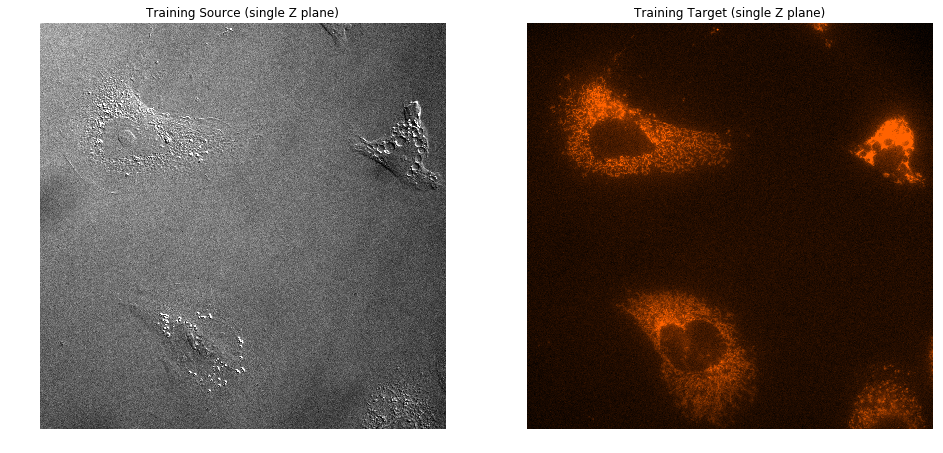

In [8]:
#@markdown ###Datasets
#Datasets

#Change checkpoints
replace("/content/pytorch_fnet/train_model.py","'--interval_save', type=int, default=500","'--interval_save', type=int, default=100")

#Adapt Class Dataset for Tiff files
replace("/content/pytorch_fnet/train_model.py","'--class_dataset', default='CziDataset'","'--class_dataset', default='TiffDataset'")


### Choosing and editing the path names ###

#Fetch the path and extract the name of the signal folder
Training_source = "/content/gdrive/MyDrive/Datasets/MitoTrckr 2/PNG/Training_source" #@param {type: "string"}
source_name = os.path.basename(os.path.normpath(Training_source))

#Fetch the path and extract the name of the signal folder
Training_target = "/content/gdrive/MyDrive/Datasets/MitoTrckr 2/PNG/Training_target" #@param {type: "string"}
target_name =  os.path.basename(os.path.normpath(Training_target))

#@markdown ###Model name and model path
model_name = "fnetTF2_test2" #@param {type:"string"}
model_path = "/content/gdrive/MyDrive/Datasets/MitoTrckr 2/PNG/Model" #@param {type:"string"}
full_model_path = model_path+'/'+model_name

new_full_model_path = convert_to_script_compatible_path(full_model_path)
new_full_model_path_csv = new_full_model_path+'\/'+model_name+'\.csv'
new_full_model_path_val_csv = new_full_model_path+'\/'+model_name+'_val\.csv'

#here we check that no model with the same name already exist, if so print a warning
if os.path.exists(model_path+'/'+model_name):
  print(bcolors.WARNING +"!! WARNING: "+model_name+" already exists and will be deleted in the following cell !!")
  print(bcolors.WARNING +"To continue training "+model_name+", choose a new model_name here, and load "+model_name+" in section 3.3")
#@markdown ---

#@markdown ###Training Parameters

percentage_validation =  10#@param{type:"number"}

source = os.listdir(Training_source)
target = os.listdir(Training_target)
number_of_images =  len(source[:-round(len(source)*(percentage_validation/100))])


model_name_x = model_name+"}" # this variable is only used to ensure closed curly brackets when editing the .sh files


### Edit the train.sh script file and train.py file ###

#We need to declare that we will run validation on the dataset
#We need to add a new line to the train.sh file
with open("/content/pytorch_fnet/scripts/train_model.sh", "r") as f:
  if not "gpu_ids ${GPU_IDS} \\" in f.read():
    replace("/content/pytorch_fnet/scripts/train_model.sh","       --gpu_ids ${GPU_IDS}","       --gpu_ids ${GPU_IDS} \\")

#We add the necessary validation parameters here.
with open('/content/pytorch_fnet/scripts/train_model.sh','r') as scriptfile:
  lines = scriptfile.readlines()
  if 'PATH_DATASET_VAL_CSV' not in lines:
    insert = 'PATH_DATASET_VAL_CSV="data/csvs/${DATASET}_val.csv"'
    add_insert("/content/pytorch_fnet/scripts/train_model.sh",10,insert,"")
    add_insert("/content/pytorch_fnet/scripts/train_model.sh",22,'\n       --path_dataset_val_csv ${PATH_DATASET_VAL_CSV}',"")
    
#Clear the White space from train.sh
with open('/content/pytorch_fnet/scripts/train_model.sh', 'r') as inFile,\
     open('/content/pytorch_fnet/scripts/train_model_temp.sh', 'w') as outFile:
    for line in inFile:
        if line.strip():
            outFile.write(line)
os.remove('/content/pytorch_fnet/scripts/train_model.sh')
os.rename('/content/pytorch_fnet/scripts/train_model_temp.sh','/content/pytorch_fnet/scripts/train_model.sh')

# #Here we define the random set of training files to be used for validation
val_files = source[-round(len(source)*(percentage_validation/100)):]
source_files = source[:-round(len(source)*(percentage_validation/100))]

# #Finally, we create a validation csv file to construct the validation dataset
# with open(model_path+'/'+model_name+'/'+model_name+'_val.csv', 'w', newline='') as file:
#   writer = csv.writer(file)
#   writer.writerow(["path_signal","path_target"])
#   for i in range(0,len(val_files)):
#     writer.writerow([Training_source+'/'+val_files[i],Training_target+'/'+val_files[i]])


# with open(model_path+'/'+model_name+'/'+model_name+'.csv', 'w', newline='') as file:
#   writer = csv.writer(file)
#   writer.writerow(["path_signal","path_target"])
#   for i in range(0,len(source_files)):
#     writer.writerow([Training_source+"/"+source_files[i],Training_target+"/"+source_files[i]])


#Training parameters in fnet are indicated in the train_model.sh file.
#Here, we edit this file to include the desired parameters

#1. Add permissions to train_model.sh
os.chdir("/content/pytorch_fnet/scripts")
!chmod u+x train_model.sh

#2. Select parameters
steps =  50000#@param {type:"number"}
batch_size =  64#@param {type:"number"}
# learning_rate = 0.0001
# patch_size = 256

number_of_images =  len(source_files)

#3. Insert the above values into train_model.sh
!if ! grep saved_models\/\${ train_model.sh;then sed -i 's/saved_models\/.*/saved_models\/\${DATASET}"/g' train_model.sh; fi 
!sed -i "s/1:-.*/1:-$model_name_x/g" train_model.sh #change the dataset to be trained with
!sed -i "s/N_ITER=.*/N_ITER=$steps/g" train_model.sh #change the number of training iterations (steps)
!sed -i "s/BUFFER_SIZE=.*/BUFFER_SIZE=$number_of_images/g" train_model.sh #change the number of training images
!sed -i "s/BATCH_SIZE=.*/BATCH_SIZE=$batch_size/g" train_model.sh #change the batch size

!sed -i 's/RUN_DIR=.*/RUN_DIR="$new_full_model_path"/g' train_model.sh
!sed -i 's/PATH_DATASET_TRAIN_CSV=.*/PATH_DATASET_TRAIN_CSV="$new_full_model_path_csv"/g' train_model.sh
!sed -i 's/PATH_DATASET_VAL_CSV=.*/PATH_DATASET_VAL_CSV="$new_full_model_path_val_csv"/g' train_model.sh

#We also change the training split as in our notebook the test images are used separately for prediction and we want fnet to train on the whole training data set.

replace('/content/pytorch_fnet/scripts/train_model.sh','python scripts', '#python scripts')
replace('/content/pytorch_fnet/scripts/train_model.sh','python train_model.py', 'python /content/pytorch_fnet/train_model.py')
replace('/content/pytorch_fnet/scripts/train_model.sh','PATH_DATASET_ALL_CSV','#PATH_DATASET_ALL_CSV')

#No Augmentation by default
Use_Data_augmentation = False

#Load one randomly chosen training source file
random_choice=random.choice(os.listdir(Training_source))
x = io.imread(Training_source+"/"+random_choice)

os.chdir(Training_target)
y = io.imread(Training_target+"/"+random_choice)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, norm=simple_norm(x, percent = 99), interpolation='nearest')
plt.axis('off')
plt.title('Training Source (single Z plane)');
plt.subplot(1,2,2)
plt.imshow(y, norm=simple_norm(y, percent = 99), interpolation='nearest')
plt.axis('off')
plt.title('Training Target (single Z plane)');
plt.savefig('/content/TrainingDataExample_Fnet.png',bbox_inches='tight',pad_inches=0)

## **3.2. Data augmentation**
---
<font size = 4>

<font size = 4>Data augmentation can improve training progress by amplifying differences in the dataset. This can be useful if the available dataset is small since, in this case, it is possible that a network could quickly learn every example in the dataset (overfitting), without augmentation. Augmentation is not necessary for training and if your training dataset is large you should disable it.

<font size = 4>Data augmentation is performed here by rotating images in XY-Plane and flip them along X-Axis. This only works if the patches are square in XY.

<font size = 4>**Note:** Using a full augmented dataset can exceed the RAM limitations of the colab notebook. If the augmented dataset is too large, the notebook will therefore only pick a subset of the augmented dataset for training. Make sure you only augment datasets which are small (ca. 20-30 images).

<font size = 4>**Note 2: If you intend to use the retraining option at a later point, save the dataset in a folder in your Google Drive.**

In [10]:
from skimage import io
import numpy as np

Use_Data_augmentation = False #@param{type:"boolean"}

#@markdown Select this option if you want to use augmentation to increase the size of your dataset

#@markdown **Rotate each image 3 times by 90 degrees.**
Rotation = True #@param{type:"boolean"}

#@markdown **Flip each image once around the x axis of the stack.**
Flip = False #@param{type:"boolean"}


#@markdown **Would you like to save your augmented images?**

Save_augmented_images = False #@param {type:"boolean"}

Saving_path = "" #@param {type:"string"}


if not Save_augmented_images:
  Saving_path= "/content"


def rotation_aug(Source_path, Target_path, aug_source_dest='augmented_source', aug_target_dest='augmented_target', flip=False):
  Source_images = os.listdir(Source_path)
  Target_images = os.listdir(Target_path)
  
  for image in Source_images:
    source_img = io.imread(os.path.join(Source_path,image))
    target_img = io.imread(os.path.join(Target_path,image))
    
    # Source Rotation
    source_img_90 = np.rot90(source_img,axes=(0,1))
    source_img_180 = np.rot90(source_img_90,axes=(0,1))
    source_img_270 = np.rot90(source_img_180,axes=(0,1))

    # Target Rotation
    target_img_90 = np.rot90(target_img,axes=(0,1))
    target_img_180 = np.rot90(target_img_90,axes=(0,1))
    target_img_270 = np.rot90(target_img_180,axes=(0,1))

    # Add a flip to the rotation
    
    if flip == True:
      source_img_lr = np.fliplr(source_img)
      source_img_90_lr = np.fliplr(source_img_90)
      source_img_180_lr = np.fliplr(source_img_180)
      source_img_270_lr = np.fliplr(source_img_270)

      target_img_lr = np.fliplr(target_img)
      target_img_90_lr = np.fliplr(target_img_90)
      target_img_180_lr = np.fliplr(target_img_180)
      target_img_270_lr = np.fliplr(target_img_270)

      #source_img_90_ud = np.flipud(source_img_90)
 
    # Save the augmented files
    # Source images
    io.imsave(Saving_path+'/'+aug_source_dest+'/'+image,source_img)
    io.imsave(Saving_path+'/'+aug_source_dest+'/'+os.path.splitext(image)[0]+'_90.tif',source_img_90)
    io.imsave(Saving_path+'/'+aug_source_dest+'/'+os.path.splitext(image)[0]+'_180.tif',source_img_180)
    io.imsave(Saving_path+'/'+aug_source_dest+'/'+os.path.splitext(image)[0]+'_270.tif',source_img_270)
    # Target images
    io.imsave(Saving_path+'/'+aug_target_dest+'/'+image,target_img)
    io.imsave(Saving_path+'/'+aug_target_dest+'/'+os.path.splitext(image)[0]+'_90.tif',target_img_90)
    io.imsave(Saving_path+'/'+aug_target_dest+'/'+os.path.splitext(image)[0]+'_180.tif',target_img_180)
    io.imsave(Saving_path+'/'+aug_target_dest+'/'+os.path.splitext(image)[0]+'_270.tif',target_img_270)

    if flip == True:
      io.imsave(Saving_path+'/'+aug_source_dest+'/'+os.path.splitext(image)[0]+'_lr.tif',source_img_lr)
      io.imsave(Saving_path+'/'+aug_source_dest+'/'+os.path.splitext(image)[0]+'_90_lr.tif',source_img_90_lr)
      io.imsave(Saving_path+'/'+aug_source_dest+'/'+os.path.splitext(image)[0]+'_180_lr.tif',source_img_180_lr)
      io.imsave(Saving_path+'/'+aug_source_dest+'/'+os.path.splitext(image)[0]+'_270_lr.tif',source_img_270_lr)

      io.imsave(Saving_path+'/'+aug_target_dest+'/'+os.path.splitext(image)[0]+'_lr.tif',target_img_lr)
      io.imsave(Saving_path+'/'+aug_target_dest+'/'+os.path.splitext(image)[0]+'_90_lr.tif',target_img_90_lr)
      io.imsave(Saving_path+'/'+aug_target_dest+'/'+os.path.splitext(image)[0]+'_180_lr.tif',target_img_180_lr)
      io.imsave(Saving_path+'/'+aug_target_dest+'/'+os.path.splitext(image)[0]+'_270_lr.tif',target_img_270_lr)

def flip(Source_path, Target_path, aug_source_dest='augmented_source', aug_target_dest='augmented_target'):
  Source_images = os.listdir(Source_path)
  Target_images = os.listdir(Target_path) 

  for image in Source_images:
    source_img = io.imread(os.path.join(Source_path,image))
    target_img = io.imread(os.path.join(Target_path,image))
    
    source_img_lr = np.fliplr(source_img)
    target_img_lr = np.fliplr(target_img)

    io.imsave(Saving_path+'/'+aug_source_dest+'/'+image,source_img)
    io.imsave(Saving_path+'/'+aug_source_dest+'/'+os.path.splitext(image)[0]+'_lr.tif',source_img_lr)

    io.imsave(Saving_path+'/'+aug_target_dest+'/'+image,target_img)
    io.imsave(Saving_path+'/'+aug_target_dest+'/'+os.path.splitext(image)[0]+'_lr.tif',target_img_lr)


if Use_Data_augmentation:

  if os.path.exists(Saving_path+'/augmented_source'):
    shutil.rmtree(Saving_path+'/augmented_source')
  os.mkdir(Saving_path+'/augmented_source')

  if os.path.exists(Saving_path+'/augmented_target'):
    shutil.rmtree(Saving_path+'/augmented_target')  
  os.mkdir(Saving_path+'/augmented_target')
  
  print("Data augmentation enabled")
  print("Data augmentation in progress....")

  if Rotation == True:
    rotation_aug(Training_source,Training_target,flip=Flip)
  elif Rotation == False and Flip == True:
    flip(Training_source,Training_target)

    #Fetch the path and extract the name of the signal folder
    Training_source = Saving_path+"/augmented_source"
    source_name = os.path.basename(os.path.normpath(Training_source))

    #Fetch the path and extract the name of the target folder
    Training_target = Saving_path+"/augmented_target"
    target_name =  os.path.basename(os.path.normpath(Training_target))

  
  # aug_source = os.listdir(Saving_path+'/augmented_source')
  # aug_val_files = aug_source[-round(len(aug_source)*(percentage_validation/100)):]
  # aug_source_files = aug_source[:-round(len(aug_source)*(percentage_validation/100))]

  # #Finally, we create a validation csv file to construct the validation dataset
  # with open(model_path+'/'+model_name+'/'+model_name+'_val.csv', 'w', newline='') as file:
  #   writer = csv.writer(file)
  #   writer.writerow(["path_signal","path_target"])
  #   for i in range(0,len(aug_val_files)):
  #     writer.writerow([Saving_path+'/augmented_source/'+aug_val_files[i],Saving_path+"/augmented_target/"+aug_val_files[i]])

  # with open(model_path+'/'+model_name+'/'+model_name+'.csv', 'w', newline='') as file:
  #   writer = csv.writer(file)
  #   writer.writerow(["path_signal","path_target"])
  #   for i in range(0,len(aug_source_files)):
  #     writer.writerow([Saving_path+'/augmented_source/'+aug_source_files[i],Saving_path+'/augmented_target/'+aug_source_files[i]])

  #Here, we ensure that there aren't too many images in the buffer.
  #The best value will depend on the size of the images and the assigned GPU.
  #If too many images are loaded to the buffer the notebook will terminate the training as the RAM limit will be exceeded.
  # if len(aug_source)>100:
  #   number_of_images =  100
  # else:
  #   number_of_images = len(aug_source)

  os.chdir("/content/pytorch_fnet/scripts")
  !chmod u+x train_model.sh
  !sed -i "s/BUFFER_SIZE=.*/BUFFER_SIZE=$number_of_images/g" train_model.sh #change the number of training images

  print("Done")
if not Use_Data_augmentation:
  print(bcolors.WARNING+"Data augmentation disabled")

Data augmentation disabled


#**4. Train the network**
---
<font size = 4>Before training, carefully read the different options. This applies especially if you have trained fnet on a dataset before.


###**Choose one of the options to train fnet**.

<font size = 4>**4.1.** If this is the first training on the chosen dataset, play this section to start training.

<font size = 4>**4.2.** If you want to continue training on an already pre-trained model choose this section

<font size = 4><font color = red> **Carefully read the options before starting training.**

##**4.1. Start Training**
---

####Play the cell below to start training. 

<font size = 4>**Note:** If you are training with a model of the same name as before, the model will be overwritten. If you want to keep the previous model save it before playing the cell below or give your model a different name (section 3).

<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder as all data can be erased at the next training if using the same folder.

In [22]:
#@markdown ##Create the dataset files for training
if os.path.exists(model_path+'/'+model_name):
  shutil.rmtree(model_path+'/'+model_name)
  print(bcolors.WARNING +"!! Existing model "+model_name+" was found and overwritten!!")
os.mkdir(model_path+'/'+model_name)

#os.chdir(model_path)
# source = os.listdir(Training_source)
# target = os.listdir(Training_target)

if Use_Data_augmentation == True:

  aug_source = os.listdir(Saving_path+'/augmented_source')
  aug_val_files = aug_source[-round(len(aug_source)*(percentage_validation/100)):]
  aug_source_files = aug_source[:-round(len(aug_source)*(percentage_validation/100))]

  #Finally, we create a validation csv file to construct the validation dataset
  with open(model_path+'/'+model_name+'/'+model_name+'_val.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["path_signal","path_target"])
    for i in range(0,len(aug_val_files)):
      writer.writerow([Saving_path+'/augmented_source/'+aug_val_files[i],Saving_path+"/augmented_target/"+aug_val_files[i]])

  with open(model_path+'/'+model_name+'/'+model_name+'.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["path_signal","path_target"])
    for i in range(0,len(aug_source_files)):
      writer.writerow([Saving_path+'/augmented_source/'+aug_source_files[i],Saving_path+'/augmented_target/'+aug_source_files[i]])

else:
  #Here we define the random set of training files to be used for validation
  val_files = source[-round(len(source)*(percentage_validation/100)):]
  source_files = source[:-round(len(source)*(percentage_validation/100))]

  #Finally, we create a validation csv file to construct the validation dataset
  with open(model_path+'/'+model_name+'/'+model_name+'_val.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["path_signal","path_target"])
    for i in range(0,len(val_files)):
      writer.writerow([Training_source+'/'+val_files[i],Training_target+'/'+val_files[i]])


  with open(model_path+'/'+model_name+'/'+model_name+'.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["path_signal","path_target"])
    for i in range(0,len(source_files)):
      writer.writerow([Training_source+"/"+source_files[i],Training_target+"/"+source_files[i]])

!! Existing model fnetTF2_test2 was found and overwritten!!


In [23]:
#@markdown ####If your dataset is large the notebook might crash unexpectedly when loading the training data into the buffer. If this happens, reduce the number of images to be loaded into the buffer and restart the training.
os.chdir("/content/pytorch_fnet/scripts")
number_of_images =   100#@param{type:"number"}
!chmod u+x train_model.sh
!sed -i "s/BUFFER_SIZE=.*/BUFFER_SIZE=$number_of_images/g" train_model.sh #change the number of training images

In [24]:
#@markdown ##Start training

pdf_export(augmentation = Use_Data_augmentation)
start = time.time()

os.chdir('/content')
add_insert("/content/pytorch_fnet/fnet/functions.py",5,"import fnet.fnet_model","")

### TRAIN THE MODEL ###

print('Let''s start the training!')
#Here we start the training
!/content/pytorch_fnet/scripts/train_model.sh $model_name 0

# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

#Create a pdf document with training summary

pdf_export(trained = True, augmentation = Use_Data_augmentation)


Lets start the training!
+ DATASET=fnetTF2_test2
+ N_ITER=50000
+ BUFFER_SIZE=100
+ BATCH_SIZE=64
+ RUN_DIR='/content/gdrive/MyDrive/Datasets/MitoTrckr 2/PNG/Model/fnetTF2_test2'
+ PATH_DATASET_TRAIN_CSV='/content/gdrive/MyDrive/Datasets/MitoTrckr 2/PNG/Model/fnetTF2_test2/fnetTF2_test2.csv'
+ GPU_IDS=0
+ PATH_DATASET_VAL_CSV='/content/gdrive/MyDrive/Datasets/MitoTrckr 2/PNG/Model/fnetTF2_test2/fnetTF2_test2_val.csv'
+ PATH_DATASET_VAL_CSV='/content/gdrive/MyDrive/Datasets/MitoTrckr 2/PNG/Model/fnetTF2_test2/fnetTF2_test2_val.csv'
+ python /content/pytorch_fnet/train_model.py --n_iter 50000 --path_dataset_csv /content/gdrive/MyDrive/Datasets/MitoTrckr 2/PNG/Model/fnetTF2_test2/fnetTF2_test2.csv --buffer_size 100 --buffer_switch_frequency 2000000 --batch_size 64 --path_run_dir /content/gdrive/MyDrive/Datasets/MitoTrckr 2/PNG/Model/fnetTF2_test2 --gpu_ids 0 --path_dataset_val_csv /content/gdrive/MyDrive/Datasets/MitoTrckr 2/PNG/Model/fnetTF2_test2/fnetTF2_test2_val.csv
usage: train_model

<font size = 4>**Note:** Fnet takes a long time for training. If your notebook times out due to the length of the training or due to a loss of GPU acceleration the last checkpoint will be saved in the saved_models folder in the pytorch_fnet folder. If you want to save it in a more convenient location on your drive, remount the drive (if you got disconnected) and in the next cell enter the location (`model_path`) where you want to save the model (`model_name`) before continuing in 4.2. **If you did not time out you can ignore this section.**

##**4.2. Training from a previously saved model**
---
<font size = 4>This section allows you to use networks you have previously trained and saved and to continue training them for more training steps. The folders have the same meaning as above (3.1.). If you want to save the previously trained model, create a copy now as this section will overwrite the weights of the old model. **You can currently only train the model with the same dataset and batch size that the network was previously trained on. Make sure your training datasets are in the same location as when you originally trained the model.**

<font size = 4>**Note: To use this section the *pytorch_fnet* folder must be in your *gdrive/My Drive*. (Simply, play cell 2. to make sure).**

In [21]:
#@markdown To test if performance improves after the initial training, you can continue training on the old model. This option can also be useful if Colab disconnects or times out.
#@markdown Enter the paths of the datasets you want to continue training on.

#Here we repeat steps already used above in case the notebook needs to be restarted for this cell.
#We need to add a new line to the train.sh file
with open("/content/pytorch_fnet/scripts/train_model.sh", "r") as f:
  if not "gpu_ids ${GPU_IDS} \\" in f.read():
    replace("/content/pytorch_fnet/scripts/train_model.sh","       --gpu_ids ${GPU_IDS}","       --gpu_ids ${GPU_IDS} \\")

#We add the necessary validation parameters here.
with open('/content/pytorch_fnet/scripts/train_model.sh','r') as scriptfile:
  lines = scriptfile.readlines()
  if 'PATH_DATASET_VAL_CSV' not in lines:
    insert = 'PATH_DATASET_VAL_CSV="data/csvs/${DATASET}_val.csv"'
    add_insert("/content/pytorch_fnet/scripts/train_model.sh",10,insert,"")
    add_insert("/content/pytorch_fnet/scripts/train_model.sh",22,'\n       --path_dataset_val_csv ${PATH_DATASET_VAL_CSV}',"")


#Clear the White space from train.sh
with open('/content/pytorch_fnet/scripts/train_model.sh', 'r') as inFile,\
     open('/content/pytorch_fnet/scripts/train_model_temp.sh', 'w') as outFile:
    for line in inFile:
        if line.strip():
            outFile.write(line)
os.remove('/content/pytorch_fnet/scripts/train_model.sh')
os.rename('/content/pytorch_fnet/scripts/train_model_temp.sh','/content/pytorch_fnet/scripts/train_model.sh')


#Change checkpoints
replace("/content/pytorch_fnet/train_model.py","'--interval_save', type=int, default=500","'--interval_save', type=int, default=100")

#Adapt Class Dataset for Tiff files
replace("/content/pytorch_fnet/train_model.py","'--class_dataset', default='CziDataset'","'--class_dataset', default='TiffDataset'")

### Choosing and editing the path names ###

Pretrained_model_folder = "/content/gdrive/MyDrive/Datasets/MitoTrckr 2/PNG/Model/fnetTF2_test2" #@param{type:"string"}
Pretrained_model_name = os.path.basename(Pretrained_model_folder)
Pretrained_model_path = os.path.dirname(Pretrained_model_folder)

full_model_path = Pretrained_model_path+'/'+Pretrained_model_name

new_full_model_path = convert_to_script_compatible_path(full_model_path)
new_full_model_path_csv = new_full_model_path+'\/'+Pretrained_model_name+'\.csv'
new_full_model_path_val_csv = new_full_model_path+'\/'+Pretrained_model_name+'_val\.csv'

Pretrained_model_name_x = Pretrained_model_name+"}"

#We get the example data and the number of images from the csv path file#

with open(full_model_path+'/'+Pretrained_model_name+'.csv') as csvfile:
  csvreader = csv.reader(csvfile)
  header = next(csvreader)
  number_of_images = 0
  for line in csvreader:
    ExampleSource = line[0]
    ExampleTarget = line[1]
    number_of_images += 1

with open(full_model_path+'/'+Pretrained_model_name+'_val.csv') as csvfile:
  csvreader = csv.reader(csvfile)
  header = next(csvreader)
  number_of_val_images = 0
  for line in csvreader:
    number_of_val_images += 1

#Batch Size

batch_size = 64 #@param {type:"number"}

# Editing the train.sh script file #

os.chdir('/content/pytorch_fnet/scripts')

#Change the train_model.sh file to include chosen dataset
!chmod u+x ./train_model.sh
!sed -i "s/1:-.*/1:-$Pretrained_model_name_x/g" train_model.sh
!sed -i "s/train_size .* -v/train_size 1.0 -v/g" train_model.sh #Use the whole training dataset for training
!sed -i "s/BUFFER_SIZE=.*/BUFFER_SIZE=$number_of_images/g" train_model.sh #change the number of training images
!sed -i "s/BATCH_SIZE=.*/BATCH_SIZE=$batch_size/g" train_model.sh #change the batch size

!sed -i 's/RUN_DIR=.*/RUN_DIR="$new_full_model_path"/g' train_model.sh
!sed -i 's/PATH_DATASET_TRAIN_CSV=.*/PATH_DATASET_TRAIN_CSV="$new_full_model_path_csv"/g' train_model.sh
!sed -i 's/PATH_DATASET_VAL_CSV=.*/PATH_DATASET_VAL_CSV="$new_full_model_path_val_csv"/g' train_model.sh

replace('/content/pytorch_fnet/scripts/train_model.sh','python scripts', '#python scripts')
replace('/content/pytorch_fnet/scripts/train_model.sh','python train_model.py', 'python /content/pytorch_fnet/train_model.py')
replace('/content/pytorch_fnet/scripts/train_model.sh','PATH_DATASET_ALL_CSV','#PATH_DATASET_ALL_CSV')

# Find the number of steps to add and then add #
with open(Pretrained_model_folder+'/losses.csv') as f:
  previous_steps = sum(1 for line in f)
print('continuing training after step '+str(previous_steps-1))

print('To start re-training play section 4.2. below')

#@markdown For how many additional steps do you want to train the model?
add_steps =  2000#@param {type:"number"}

#Calculate the new number of total training epochs. Subtract 1 to discount the title row of the csv file.
new_steps = previous_steps + add_steps -1
os.chdir('/content/pytorch_fnet/scripts')

#Edit train_model.sh file to include new total number of training epochs
!sed -i "s/N_ITER=.*/N_ITER=$new_steps/g" train_model.sh

# Display example data #

#Load one randomly chosen training source file
#random_choice=random.choice(os.listdir(Training_source))
x = io.imread(ExampleSource)

#Find image Z dimension and select the mid-plane
# Image_Z = x.shape[0]
# mid_plane = int(Image_Z / 2)+1

#os.chdir(Training_target)
y = io.imread(ExampleTarget)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, norm=simple_norm(x, percent = 99), interpolation='nearest')
plt.axis('off')
plt.title('Training Source (single Z plane)');
plt.subplot(1,2,2)
plt.imshow(y, norm=simple_norm(y, percent = 99), interpolation='nearest')
plt.axis('off')
plt.title('Training Target (single Z plane)');
plt.savefig('/content/TrainingDataExample_Fnet.png',bbox_inches='tight',pad_inches=0)

FileNotFoundError: ignored

In [ ]:
Use_Data_augmentation = False 
start = time.time()

#@markdown ##4.2. Start re-training model
# !pip install tifffile==2019.7.26

os.chdir('/content/pytorch_fnet/fnet')

add_insert("/content/pytorch_fnet/fnet/functions.py",5,"import fnet.fnet_model","")

#Here we retrain the model on the chosen dataset.
os.chdir('/content/pytorch_fnet/')
!chmod u+x ./scripts/train_model.sh
!./scripts/train_model.sh $Pretrained_model_name 0

# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

#Here, we redefine the variable names for the pdf export
percentage_validation = round((number_of_val_images/(number_of_images+number_of_val_images))*100)
steps = new_steps
model_name = Pretrained_model_name
model_path = Pretrained_model_path
Training_source = os.path.dirname(ExampleSource)
Training_target = os.path.dirname(ExampleTarget)
#Create a pdf document with training summary
pdf_export(trained = True, augmentation = Use_Data_augmentation)


# **5. Evaluate your model**
---

This section allows the user to perform important quality checks on the validity and generalisability of the trained model. 

**We highly recommend to perform quality control on all newly trained models.**

In [16]:
# model name and path
#@markdown ###Do you want to assess the model you just trained ?

Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the name of the model and path to model folder:

QC_model_folder = "" #@param {type:"string"}
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)

if (Use_the_current_trained_model): 
  print("Using current trained network")
  QC_model_name = model_name
  QC_model_path = model_path

#Create a folder for the quality control metrics
if os.path.exists(QC_model_path+"/"+QC_model_name+"/QualityControl"):
  shutil.rmtree(QC_model_path+"/"+QC_model_name+"/QualityControl")
os.makedirs(QC_model_path+"/"+QC_model_name+"/QualityControl")

full_QC_model_path = QC_model_path+'/'+QC_model_name
if os.path.exists(full_QC_model_path):
  print("The "+QC_model_name+" network will be evaluated")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')

Using current trained network
The fnetTF2_test2 network will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>First, it is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.




In [17]:
#@markdown ##Play the cell to show figure of training errors

lossDataFromCSV = []
vallossDataFromCSV = []

iterationNumber_training = []
iterationNumber_val = []

import csv
from matplotlib import pyplot as plt
with open(QC_model_path+'/'+QC_model_name+'/'+'losses.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    next(plots)
    for row in plots:
        iterationNumber_training.append(int(row[0]))
        lossDataFromCSV.append(float(row[1]))

with open(QC_model_path+'/'+QC_model_name+'/'+'losses_val.csv','r') as csvfile_val:
  plots = csv.reader(csvfile_val, delimiter=',')
  next(plots)
  for row in plots:
    iterationNumber_val.append(int(row[0]))
    vallossDataFromCSV.append(float(row[1]))

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(iterationNumber_training, lossDataFromCSV, label='Training loss')
plt.plot(iterationNumber_val, vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. iteration number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend()

plt.subplot(2,1,2)
plt.semilogy(iterationNumber_training, lossDataFromCSV, label='Training loss')
plt.semilogy(iterationNumber_val, vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. iteration number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend()
plt.savefig(QC_model_path+'/'+QC_model_name+'/QualityControl/lossCurvePlots.png', bbox_inches='tight', pad_inches=0)
plt.show()


FileNotFoundError: ignored

## **5.2. Error mapping and quality metrics estimation**
---

<font size = 4>This section will display SSIM maps and RSE maps as well as calculating total SSIM, NRMSE and PSNR metrics for all the images provided in the "Source_QC_folder" and "Target_QC_folder" !

<font size = 4>**1. The SSIM (structural similarity) map** 

<font size = 4>The SSIM metric is used to evaluate whether two images contain the same structures. It is a normalized metric and an SSIM of 1 indicates a perfect similarity between two images. Therefore for SSIM, the closer to 1, the better. The SSIM maps are constructed by calculating the SSIM metric in each pixel by considering the surrounding structural similarity in the neighbourhood of that pixel (currently defined as window of 11 pixels and with Gaussian weighting of 1.5 pixel standard deviation, see our Wiki for more info). 

<font size=4>**mSSIM** is the SSIM value calculated across the entire window of both images.

<font size=4>**The output below shows the SSIM maps with the mSSIM**

<font size = 4>**2. The RSE (Root Squared Error) map** 

<font size = 4>This is a display of the root of the squared difference between the normalized predicted and target or the source and the target. In this case, a smaller RSE is better. A perfect agreement between target and prediction will lead to an RSE map showing zeros everywhere (dark).


<font size =4>**NRMSE (normalised root mean squared error)** gives the average difference between all pixels in the images compared to each other. Good agreement yields low NRMSE scores.

<font size = 4>**PSNR (Peak signal-to-noise ratio)** is a metric that gives the difference between the ground truth and prediction (or source input) in decibels, using the peak pixel values of the prediction and the MSE between the images. The higher the score the better the agreement.

<font size=4>**The output below shows the RSE maps with the NRMSE and PSNR values.**


<font size=4>**Note:** If you receive a *CUDA out of memory* error, this can be caused by the size of the data that model needs to predict or the type of GPU has allocated to your session. To solve this issue, you can *factory reset runtime* to attempt to connect to a different GPU or use a dataset with smaller images.


In [ ]:
#----------------CREATING PREDICTIONS FOR QUALITY CONTROL----------------------------------#

### Choosing and editing the path names ###

#Choose the folder with the quality control datasets
Source_QC_folder = "" #@param{type:"string"}
Target_QC_folder = "" #@param{type:"string"}
qc_images = len(os.listdir(Source_QC_folder))

Predictions_name = "QualityControl" 
Predictions_name_x = Predictions_name+"}"

#If the folder you are creating already exists, delete the existing version to overwrite.
if os.path.exists(QC_model_path+"/"+QC_model_name+"/QualityControl/Predictions"):
  shutil.rmtree(QC_model_path+"/"+QC_model_name+"/QualityControl/Predictions")

# Get the name of the folder the test data is in
source_dataset_name = os.path.basename(os.path.normpath(Source_QC_folder))
target_dataset_name = os.path.basename(os.path.normpath(Target_QC_folder))

new_full_QC_model_path = convert_to_script_compatible_path(full_QC_model_path)
new_full_QC_model_path_dataset = new_full_QC_model_path+'\${DATASET}'
new_full_QC_model_path_csv = new_full_QC_model_path+'\/QualityControl\/qc\${TEST_OR_TRAIN}\.csv'# Get the name of the folder the test data is in


### Editing the predict.sh script file ###

# Get permission to the predict.sh file and change the name of the dataset to the Predictions_folder.
os.chdir('/content/pytorch_fnet/')
# !chmod u+x ./scripts/predict.sh
# !sed -i "s/1:-.*/1:-$Predictions_name_x/g" ./scripts/predict.sh
!chmod u+x ./scripts/predict_2d.sh
!sed -i "1,21!d" ./scripts/predict_2d.sh

!sed -i "s/1:-.*/1:-$Predictions_name_x/g" ./scripts/predict_2d.sh

#Here, we remove the 'train' option from predict.sh as we don't need to run predictions on the train data.
#!sed -i "s/in test.*/in test/g" ./scripts/predict.sh

# !if ! grep class_dataset ./scripts/predict.sh;then sed -i 's/DIR} \\/DIR} \\\'$''\n'     --class_dataset TiffDataset \\/' /content/pytorch_fnet/scripts/predict.sh; fi
# !if grep CziDataset ./scripts/predict.sh;then sed -i 's/CziDataset/TiffDataset/' ./scripts/predict.sh; fi   

!sed -i "s/MODEL_DIR=.*/MODEL_DIR=$new_full_QC_model_path/g" ./scripts/predict_2d.sh
!sed -i "s/path_dataset_csv.*/path_dataset_csv\ $new_full_QC_model_path_csv\ \\\/g" ./scripts/predict_2d.sh
!sed -i "s/path_save_dir.*/path_save_dir $new_full_QC_model_path\/QualityControl\/Predictions\ \\\/g" ./scripts/predict_2d.sh
!sed -i "s/N_IMAGES=.*/N_IMAGES=$qc_images/g" ./scripts/predict_2d.sh

### Create a path csv file for prediction (QC)###

#Here we create a qctest.csv to locate the files used for QC
test_signal = os.listdir(Source_QC_folder)
test_target = os.listdir(Target_QC_folder)

with open(full_QC_model_path+'/QualityControl/qctest.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(["path_signal","path_target"])
      for i in range(0,len(test_signal)):
        writer.writerow([Source_QC_folder+'/'+test_signal[i],Target_QC_folder+'/'+test_signal[i]])

### RUN THE PREDICTION ###
!./scripts/predict_2d.sh $Predictions_name 0

### Save the results ###
QC_results_files = os.listdir(full_QC_model_path+'/QualityControl/Predictions')

if os.path.exists(QC_model_path+'/'+QC_model_name+'/QualityControl/Prediction'):
  shutil.rmtree(QC_model_path+'/'+QC_model_name+'/QualityControl/Prediction')
os.mkdir(QC_model_path+'/'+QC_model_name+'/QualityControl/Prediction')

if os.path.exists(QC_model_path+'/'+QC_model_name+'/QualityControl/Signal'):
  shutil.rmtree(QC_model_path+'/'+QC_model_name+'/QualityControl/Signal')
os.mkdir(QC_model_path+'/'+QC_model_name+'/QualityControl/Signal')

if os.path.exists(QC_model_path+'/'+QC_model_name+'/QualityControl/Target'):
  shutil.rmtree(QC_model_path+'/'+QC_model_name+'/QualityControl/Target')
os.mkdir(QC_model_path+'/'+QC_model_name+'/QualityControl/Target')

for i in range(len(QC_results_files)-2):
  if os.path.isdir(full_QC_model_path+'/QualityControl/Predictions/'+QC_results_files[i]):
    shutil.copyfile(full_QC_model_path+'/QualityControl/Predictions/'+QC_results_files[i]+'/prediction_'+QC_model_name+'.tiff', QC_model_path+'/'+QC_model_name+'/QualityControl/Prediction/'+'Predicted_'+test_signal[i])
    if os.path.exists(full_QC_model_path+'/QualityControl/Predictions/'+QC_results_files[i]+'/signal.tiff'):
      shutil.copyfile(full_QC_model_path+'/QualityControl/Predictions/'+QC_results_files[i]+'/signal.tiff', QC_model_path+'/'+QC_model_name+'/QualityControl/Signal/'+test_signal[i])
      shutil.copyfile(full_QC_model_path+'/QualityControl/Predictions/'+QC_results_files[i]+'/target.tiff', QC_model_path+'/'+QC_model_name+'/QualityControl/Target/'+test_signal[i])
    else:
      shutil.copyfile(Source_QC_folder+'/'+test_signal[i],QC_model_path+'/'+QC_model_name+'/QualityControl/Signal/'+test_signal[i])
      shutil.copyfile(Target_QC_folder+'/'+test_target[i],QC_model_path+'/'+QC_model_name+'/QualityControl/Target/'+test_signal[i])

shutil.rmtree(full_QC_model_path+'/QualityControl/Predictions')

#-----------------------------METRICS EVALUATION-------------------------------#

# Calculating the position of the mid-plane slice
# Perform prediction on all datasets in the Source_QC folder

#Finding the middle slice
img = io.imread(os.path.join(Source_QC_folder, os.listdir(Source_QC_folder)[0]))
# n_slices = img.shape[0]
# z_mid_plane = int(n_slices / 2)+1

path_metrics_save = QC_model_path+'/'+QC_model_name+'/QualityControl/'

# Open and create the csv file that will contain all the QC metrics
with open(path_metrics_save+'QC_metrics_'+QC_model_name+".csv", "w", newline='') as file:
    writer = csv.writer(file)

    # Write the header in the csv file
    writer.writerow(["File name","Prediction v. GT mSSIM", "Prediction v. GT NRMSE", "Prediction v. GT PSNR"])  
    
    # These lists will be used to collect all the metrics values per slice
    file_name_list = []
    slice_number_list = []
    mSSIM_GvP_list = []
    NRMSE_GvP_list = []
    PSNR_GvP_list = []

    # These lists will be used to display the mean metrics for the stacks
    mSSIM_GvP_list_mean = []
    NRMSE_GvP_list_mean = []
    PSNR_GvP_list_mean = []

    # Let's loop through the provided dataset in the QC folders
    for thisFile in os.listdir(Source_QC_folder):
      if not os.path.isdir(os.path.join(Source_QC_folder, thisFile)):
        print('Running QC on: '+thisFile)

        test_GT_stack = io.imread(os.path.join(Target_QC_folder, thisFile))
        if len(test_GT_stack.shape) > 3:
          test_GT_stack = test_GT_stack.squeeze()
        test_source_stack = io.imread(os.path.join(Source_QC_folder,thisFile))
        test_prediction_stack = io.imread(os.path.join(path_metrics_save+"Prediction/",'Predicted_'+thisFile))
        #test_prediction_stack = np.squeeze(test_prediction_stack,axis=(0,))
        #n_slices = test_GT_stack.shape[0]

        img_SSIM_GTvsPrediction_stack = np.zeros((test_GT_stack.shape[0], test_GT_stack.shape[1]))
        img_RSE_GTvsPrediction_stack = np.zeros((test_GT_stack.shape[0], test_GT_stack.shape[1]))

        #for z in range(n_slices): 
          
          # -------------------------------- Prediction --------------------------------

        test_GT_norm,test_prediction_norm = norm_minmse(test_GT_stack, test_prediction_stack, normalize_gt=True)

          # -------------------------------- Calculate the SSIM metric and maps --------------------------------

          # Calculate the SSIM maps and index
        index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = structural_similarity(test_GT_norm, np.squeeze(test_prediction_norm), data_range=1.0, full=True, gaussian_weights=True, use_sample_covariance=False, sigma=1.5)

          #Calculate ssim_maps
        img_SSIM_GTvsPrediction_stack = np.float32(img_SSIM_GTvsPrediction)
      

          # -------------------------------- Calculate the NRMSE metrics --------------------------------

          # Calculate the Root Squared Error (RSE) maps
        img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))

          # Calculate SE maps
        img_RSE_GTvsPrediction_stack = np.float32(img_RSE_GTvsPrediction)


          # Normalised Root Mean Squared Error (here it's valid to take the mean of the image)
        NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))


          # Calculate the PSNR between the images
        PSNR_GTvsPrediction = psnr(test_GT_norm,np.squeeze(test_prediction_norm),data_range=1.0)


        writer.writerow([thisFile,str(index_SSIM_GTvsPrediction),str(NRMSE_GTvsPrediction),str(PSNR_GTvsPrediction)])
          
          # Collect values to display in dataframe output
          #file_name_list.append(thisFile)
        #slice_number_list.append(z)
        mSSIM_GvP_list.append(index_SSIM_GTvsPrediction)

        NRMSE_GvP_list.append(NRMSE_GTvsPrediction)

        PSNR_GvP_list.append(PSNR_GTvsPrediction)


        #  if (z == z_mid_plane): # catch these for display
        SSIM_GTvsP_forDisplay = index_SSIM_GTvsPrediction

        NRMSE_GTvsP_forDisplay = NRMSE_GTvsPrediction

        
        # If calculating average metrics for dataframe output
        file_name_list.append(thisFile)
        mSSIM_GvP_list_mean.append(sum(mSSIM_GvP_list)/len(mSSIM_GvP_list))

        NRMSE_GvP_list_mean.append(sum(NRMSE_GvP_list)/len(NRMSE_GvP_list))

        PSNR_GvP_list_mean.append(sum(PSNR_GvP_list)/len(PSNR_GvP_list))

        # ----------- Change the stacks to 32 bit images -----------
        img_SSIM_GTvsPrediction_stack_32 = img_as_float32(img_SSIM_GTvsPrediction_stack, force_copy=False)
        img_RSE_GTvsPrediction_stack_32 = img_as_float32(img_RSE_GTvsPrediction_stack, force_copy=False)


        # ----------- Saving the error map stacks -----------
        io.imsave(path_metrics_save+'SSIM_GTvsPrediction_'+thisFile,img_SSIM_GTvsPrediction_stack_32)
        io.imsave(path_metrics_save+'RSE_GTvsPrediction_'+thisFile,img_RSE_GTvsPrediction_stack_32)

#Averages of the metrics per stack as dataframe output
pdResults = pd.DataFrame(file_name_list, columns = ["File name"])
pdResults["Prediction v. GT mSSIM"] = mSSIM_GvP_list_mean

pdResults["Prediction v. GT NRMSE"] = NRMSE_GvP_list_mean

pdResults["Prediction v. GT PSNR"] = PSNR_GvP_list_mean

pdResults.head()

# All data is now processed saved
Test_FileList = os.listdir(Source_QC_folder) # this assumes, as it should, that both source and target are named the same way

plt.figure(figsize=(15,10))
# Currently only displays the last computed set, from memory

# Target (Ground-truth)
plt.subplot(2,3,1)
plt.axis('off')
img_GT = io.imread(os.path.join(Target_QC_folder, Test_FileList[-1]))
# if len(img_GT.shape) > 3:
#   img_GT = img_GT.squeeze()
plt.imshow(img_GT)
plt.title('Target')


#Setting up colours
cmap = plt.cm.Greys


# Source
plt.subplot(2,3,2)
plt.axis('off')
img_Source = io.imread(os.path.join(Source_QC_folder, Test_FileList[-1]))
plt.imshow(img_Source,aspect='equal',cmap=cmap)
plt.title('Source')


#Prediction
plt.subplot(2,3,3)
plt.axis('off')
img_Prediction = io.imread(os.path.join(path_metrics_save+'Prediction/', 'Predicted_'+Test_FileList[-1]))
img_Prediction = np.squeeze(img_Prediction,axis=(0,))
plt.imshow(img_Prediction)
plt.title('Prediction')

#Setting up colours
cmap = plt.cm.CMRmap

#SSIM between GT and Prediction
plt.subplot(2,3,5)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)  
img_SSIM_GTvsPrediction = io.imread(os.path.join(path_metrics_save, 'SSIM_GTvsPrediction_'+Test_FileList[-1]))
imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)
plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
plt.title('SSIM map: Target vs. Prediction',fontsize=15)
plt.xlabel('mSSIM: '+str(round(SSIM_GTvsP_forDisplay,3)),fontsize=14)


#Root Squared Error between GT and Prediction
plt.subplot(2,3,6)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False) 
img_RSE_GTvsPrediction = io.imread(os.path.join(path_metrics_save, 'RSE_GTvsPrediction_'+Test_FileList[-1]))
imRSE_GTvsPrediction = plt.imshow(np.squeeze(img_RSE_GTvsPrediction), cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imRSE_GTvsPrediction,fraction=0.046,pad=0.04)
plt.title('RSE map Target vs. Prediction',fontsize=15)
plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsP_forDisplay,3))+', PSNR: '+str(round(PSNR_GTvsPrediction,3)),fontsize=14)
plt.savefig(full_QC_model_path+'/QualityControl/QC_example_data.png',bbox_inches='tight',pad_inches=0)

print('-----------------------------------')
print('Here are the average scores for the stacks you tested in Quality control. To see values for all slices, open the .csv file saved in the Qulity Control folder.')
pdResults.head()


#Make a pdf summary of the QC results

qc_pdf_export()

#**6. Using the trained model**
---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **6.1. Generate prediction(s) from unseen dataset**
---

<font size = 4>The current trained model (from section 4) can now be used to process images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Results_folder** folder.

<font size = 4>**`Data_folder`:** This folder should contain the images that you want to use your trained network on for processing.

<font size = 4>**`Results_folder`:** This folder will contain the predicted output images.

<font size = 4>If you want to use a model different from the most recently trained one, untick the box and enter the path of the model in **`Prediction_model_folder`**.

**Note: `Prediction_model_folder` expects a folder name which contains a model.p file from a previous training.**

<font size=4>**Note:** If you receive a *CUDA out of memory* error, this can be caused by the size of the data that model needs to predict or the type of GPU has allocated to your session. To solve this issue, you can *factory reset runtime* to attempt to connect to a different GPU or use a dataset with smaller images.


In [ ]:
#@markdown ### Provide the path to your dataset and to the folder where the predictions are saved, then play the cell to predict outputs from your unseen images.

Data_folder = "" #@param {type:"string"}
Results_folder = "" #@param {type:"string"}
data_files = len(os.listdir(Data_folder))

if os.path.exists(Results_folder+"/Predictions"):
  shutil.rmtree(Results_folder+"/Predictions")

#@markdown ###Do you want to use the current trained model?

Use_the_current_trained_model = True #@param{type:"boolean"}
#@markdown ###If not, provide the name of the model you want to use 

### Choosing and editing the path names ###

Prediction_model_folder = "" #@param {type:"string"}

if Use_the_current_trained_model:
  Prediction_model_folder = model_path+'/'+model_name

Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)
Prediction_model_name_x = Prediction_model_name+"}"

full_Prediction_model_path = Prediction_model_path+'/'+Prediction_model_name+'/'
if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')

# Convert the path variables into a compatible format with the script files #
# Prediction path conversion
new_full_Prediction_model_path = convert_to_script_compatible_path(full_Prediction_model_path)
new_full_Prediction_model_path_csv = new_full_Prediction_model_path+'\${TEST_OR_TRAIN}\.csv'# Get the name of the folder the test data is in

# Result path conversion
new_Results_folder_path = convert_to_script_compatible_path(Results_folder)

# Get permission to the predict.sh file and change the name of the dataset to the Predictions_folder.
os.chdir('/content/pytorch_fnet/')
!chmod u+x ./scripts/predict_2d.sh

### Editing the predict.sh script file ###

# Make sure the dataset type is set to .tif (debug note: could be changed at install in predict.py file?)
# !if ! grep class_dataset ./scripts/predict_2d.sh;then sed -i 's/DIR} \\/DIR} \\\'$''\n'     --class_dataset TiffDataset \\/' /content/pytorch_fnet/scripts/predict.sh; fi
# !if grep CziDataset ./scripts/predict_2d.sh;then sed -i 's/CziDataset/TiffDataset/' /content/pytorch_fnet/scripts/predict.sh; fi 

# We allow the maximum number of images to be processed to be higher, i.e. 1000.
!sed -i "s/N_IMAGES=.*/N_IMAGES=$data_files/g" ./scripts/predict_2d.sh
!sed -i "s/1:-.*/1:-$Prediction_model_name_x/g" ./scripts/predict_2d.sh

#Here, we remove the 'train' option from predict.sh as we don't need to run predictions on the train data.
!sed -i "s/in test.*/in test/g" ./scripts/predict.sh
!sed -i "1,21!d" ./scripts/predict_2d.sh

#We change the directories in the predict.sh file to our needed paths
!sed -i "s/MODEL_DIR=.*/MODEL_DIR=$new_full_Prediction_model_path/g" ./scripts/predict_2d.sh
!sed -i "s/path_dataset_csv.*/path_dataset_csv\ $new_full_Prediction_model_path_csv\ \\\/g" ./scripts/predict_2d.sh
!sed -i "s/path_save_dir.*/path_save_dir $new_Results_folder_path\/Predictions\ \\\/g" ./scripts/predict_2d.sh

# Changing the GPU ID seems to help reduce errors
# replace('/content/pytorch_fnet/scripts/predict.sh','${GPU_IDS}','0')

# We get rid of the options of saving signals and targets. Here, we just want predictions.
insert_1 = '     --no_signal \\\n'
insert_2 = '     --no_target \\\n'
add_insert("/content/pytorch_fnet/scripts/predict_2d.sh",14,insert_1,"")
add_insert("/content/pytorch_fnet/scripts/predict_2d.sh",14,insert_2,"")

### Create the path csv file for prediction ###

#Here we create a new test.csv with the paths to the dataset we want to predict on.
test_signal = os.listdir(Data_folder)
with open(full_Prediction_model_path+'/test.csv', 'w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(["path_signal","path_target"])
      for i in range(0,len(test_signal)):
        writer.writerow([Data_folder+"/"+test_signal[i],Data_folder+"/"+test_signal[i]])

###  WE RUN THE PREDICTION ###
start = time.time()
!/content/pytorch_fnet/scripts/predict_2d.sh $Prediction_model_name 0

# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

#Rename the results appropriately
Results = os.listdir(Results_folder+'/Predictions')
for i in Results:
  if os.path.isdir(Results_folder+'/Predictions/'+i):
    shutil.copyfile(Results_folder+'/Predictions/'+i+'/'+os.listdir(Results_folder+'/Predictions/'+i)[0],Results_folder+'/Predictions/'+'predicted_'+test_signal[int(i)])
  
for i in Results:
  if os.path.isdir(Results_folder+'/Predictions/'+i):
    shutil.rmtree(Results_folder+'/Predictions/'+i)

##**6.2. Assess predicted output**
---
<font size = 4>Here, we inspect an example prediction from the predictions on the test dataset. Select the slice of the slice you want to visualize.

In [ ]:
#@markdown ###Select the image would you like to view below

def show_image(file=os.listdir(Data_folder)):
  os.chdir(Results_folder)

#source_image = io.imread(test_signal[0])
  source_image = io.imread(os.path.join(Data_folder,file))
  prediction_image = io.imread(os.path.join(Results_folder,'Predictions/predicted_'+file))
  prediction_image = np.squeeze(prediction_image, axis=(0,))

#Create the figure
  fig = plt.figure(figsize=(10,20))

  #Setting up colours
  cmap = plt.cm.Greys

  plt.subplot(1,2,1)
  print(prediction_image.shape)
  plt.imshow(source_image, cmap = cmap, aspect = 'equal')
  plt.title('Source')
  plt.subplot(1,2,2)
  plt.imshow(prediction_image, cmap = cmap, aspect = 'equal')
  plt.title('Prediction')

interact(show_image, continuous_update=False);

## **6.3. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.

# **7. Version log**
---
<font size = 4>**v1.13.1**:  

*  Data augmentation lines 147-150 are commented as the number of images is specified by the user in Section 4


#**Thank you for using fnet!**